# Robustness of Networks
http://networksciencebook.com/chapter/8#robustness

##### Order Parameter: $P_{\infty}$
The probability $P_{\infty}\infty$ that a randomly chosen pebble belongs to the largest cluster follows


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

### Definition of axis labels and abbreviations
$LCC$: Largest connect component<br>

$CCs$: Connect Components<br>

$P_{\infty}\infty$: The probability that a randomly node belongs to the largest connect component<br>

$P_{\infty}(f)\,/\, P_{\infty}(0)$: The ratio that provides the relative size of the giant component. <br>

$f$: fraction of nodes removed from a network 

# Examples

In [2]:
G1 = nx.complete_graph(6000)
G1.name='Complete'
print(nx.info(G1),end='\n\n')

G2 = nx.grid_graph(dim=(4,1500))
G2.name='Grid_Lattice'
print(nx.info(G2),end='\n\n')

G3 = nx.barabasi_albert_graph(6000,2)
G3.name='Barabase_2'
print(nx.info(G3),end='\n\n')
plt.show()

G4 = nx.barabasi_albert_graph(6000,5)
G4.name='Barabase_5'
print(nx.info(G4),end='\n\n')
plt.show()

G5 = nx.Graph()
G5.add_edges_from([(i,i+1) for i in range(5999)])
G5.name='line'
print(nx.info(G5),end='\n\n')
plt.show()

G6 = nx.barabasi_albert_graph(6000,1)
G6.name='Barabase_1'
print(nx.info(G6),end='\n\n')
plt.show()

Name: Complete
Type: Graph
Number of nodes: 6000
Number of edges: 17997000
Average degree: 5999.0000

Name: Grid_Lattice
Type: Graph
Number of nodes: 6000
Number of edges: 10496
Average degree:   3.4987

Name: Barabase_2
Type: Graph
Number of nodes: 6000
Number of edges: 11996
Average degree:   3.9987

Name: Barabase_5
Type: Graph
Number of nodes: 6000
Number of edges: 29975
Average degree:   9.9917

Name: line
Type: Graph
Number of nodes: 6000
Number of edges: 5999
Average degree:   1.9997

Name: Barabase_1
Type: Graph
Number of nodes: 6000
Number of edges: 5999
Average degree:   1.9997



In [18]:
listOfNetworks=[G1,G4,G3,G2,G5,G6]

# Randomly remove nodes

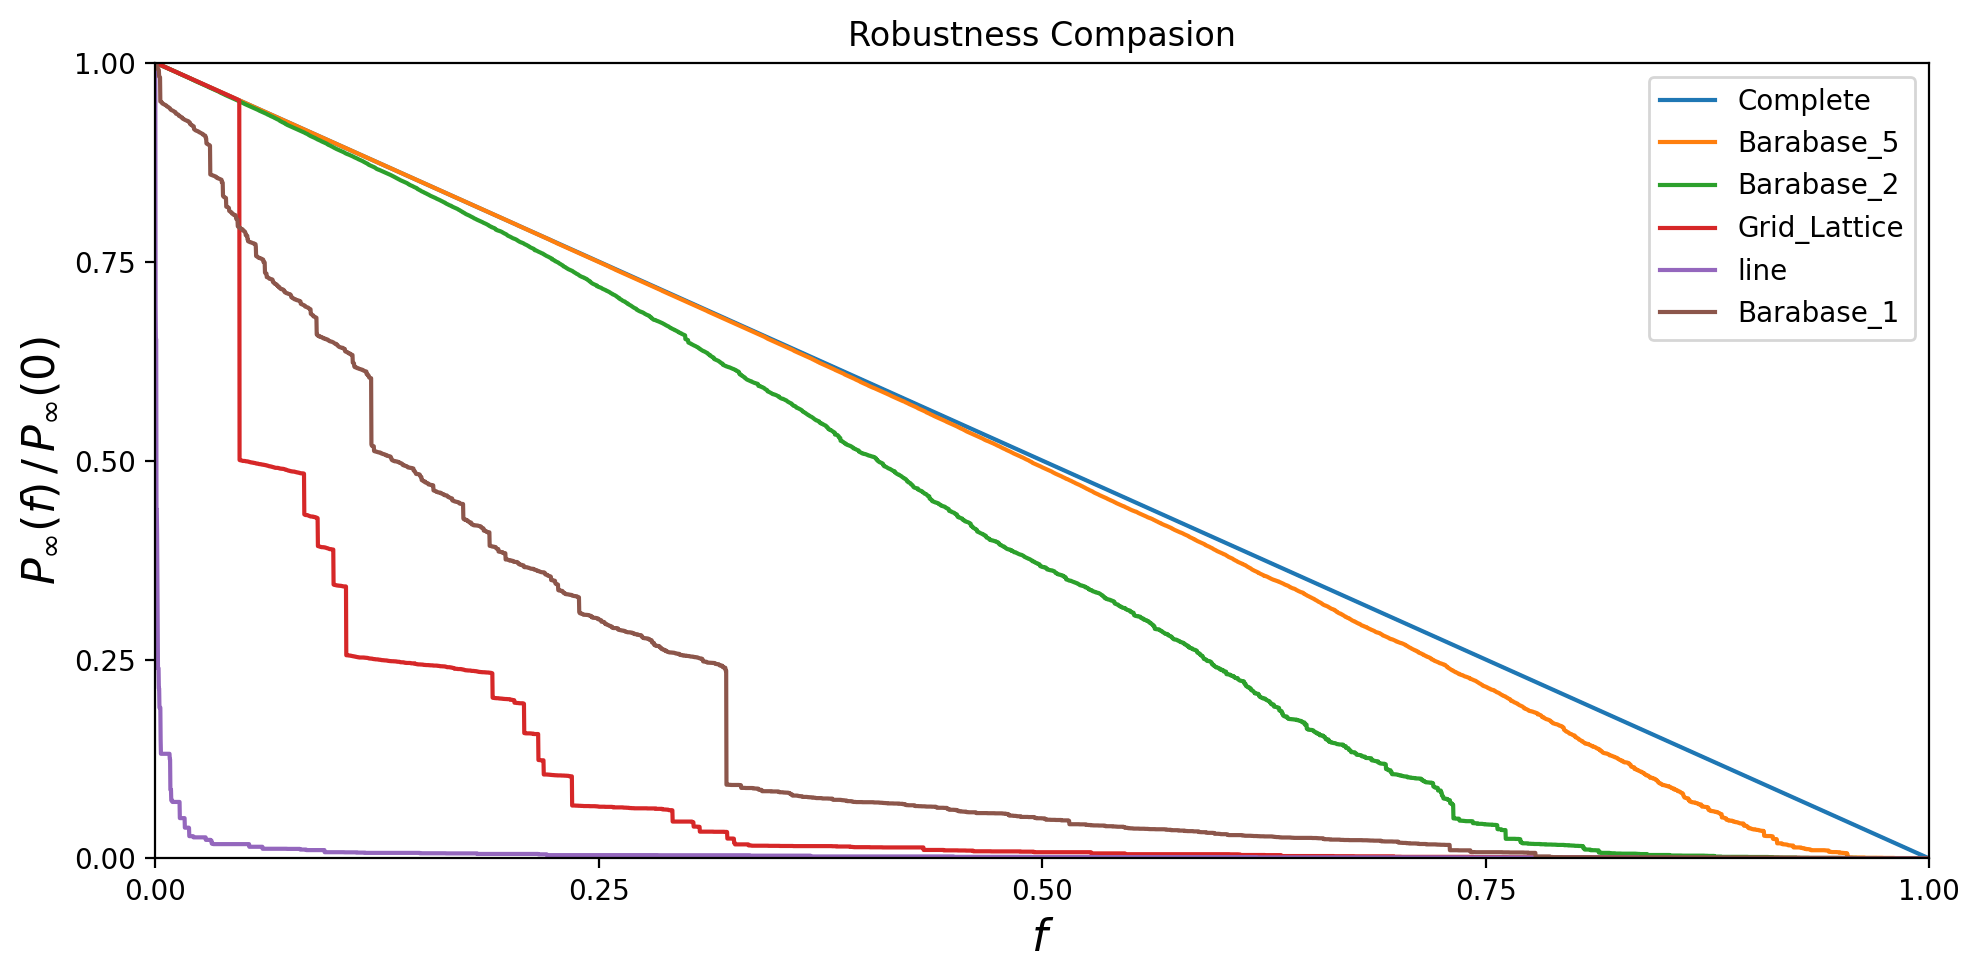

In [4]:
#Plotting    
plt.figure(figsize=(10,5),dpi=200)
plt.plot([0, 1], [1, 0], 'k--',linewidth=1)
for Gactual in listOfNetworks:
    G = Gactual.copy()
    listOfNode = list(G.nodes)
    rd.shuffle(listOfNode)#Randomize the nodes
    Nstart = G.number_of_nodes()
    yAxis=[1]
    xAxis=[0]

    for node in listOfNode:
        G.remove_node(node)
        Nactual = G.number_of_nodes()
        CCs = nx.connected_components(G)
        if Nactual != 0:
            LCC = max(CCs,key=len)
            #𝑃∞(𝑓)/𝑃∞(0)  = len(LCC)/Nstart # Because we start with a connect network, with only one connect component
            impact = len(LCC)/Nstart
        else:
            impact = 0 
        f = 1 - Nactual/Nstart
        yAxis.append(impact)
        xAxis.append(f)

    plt.plot(xAxis,yAxis,'-',label=G.name)
    
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks([0,0.25,0.5,0.75,1])
plt.ylabel(r'$P_{\infty}(f)\,/\, P_{\infty}(0)$',size=16)
plt.xlabel(r'$f$',size=16)
plt.margins(x=0.0)
plt.margins(y=0.0)
plt.title("Robustness Compasion")
plt.legend()
plt.tight_layout()
plt.show()  

# Remove By Degree: From biggest to smallest

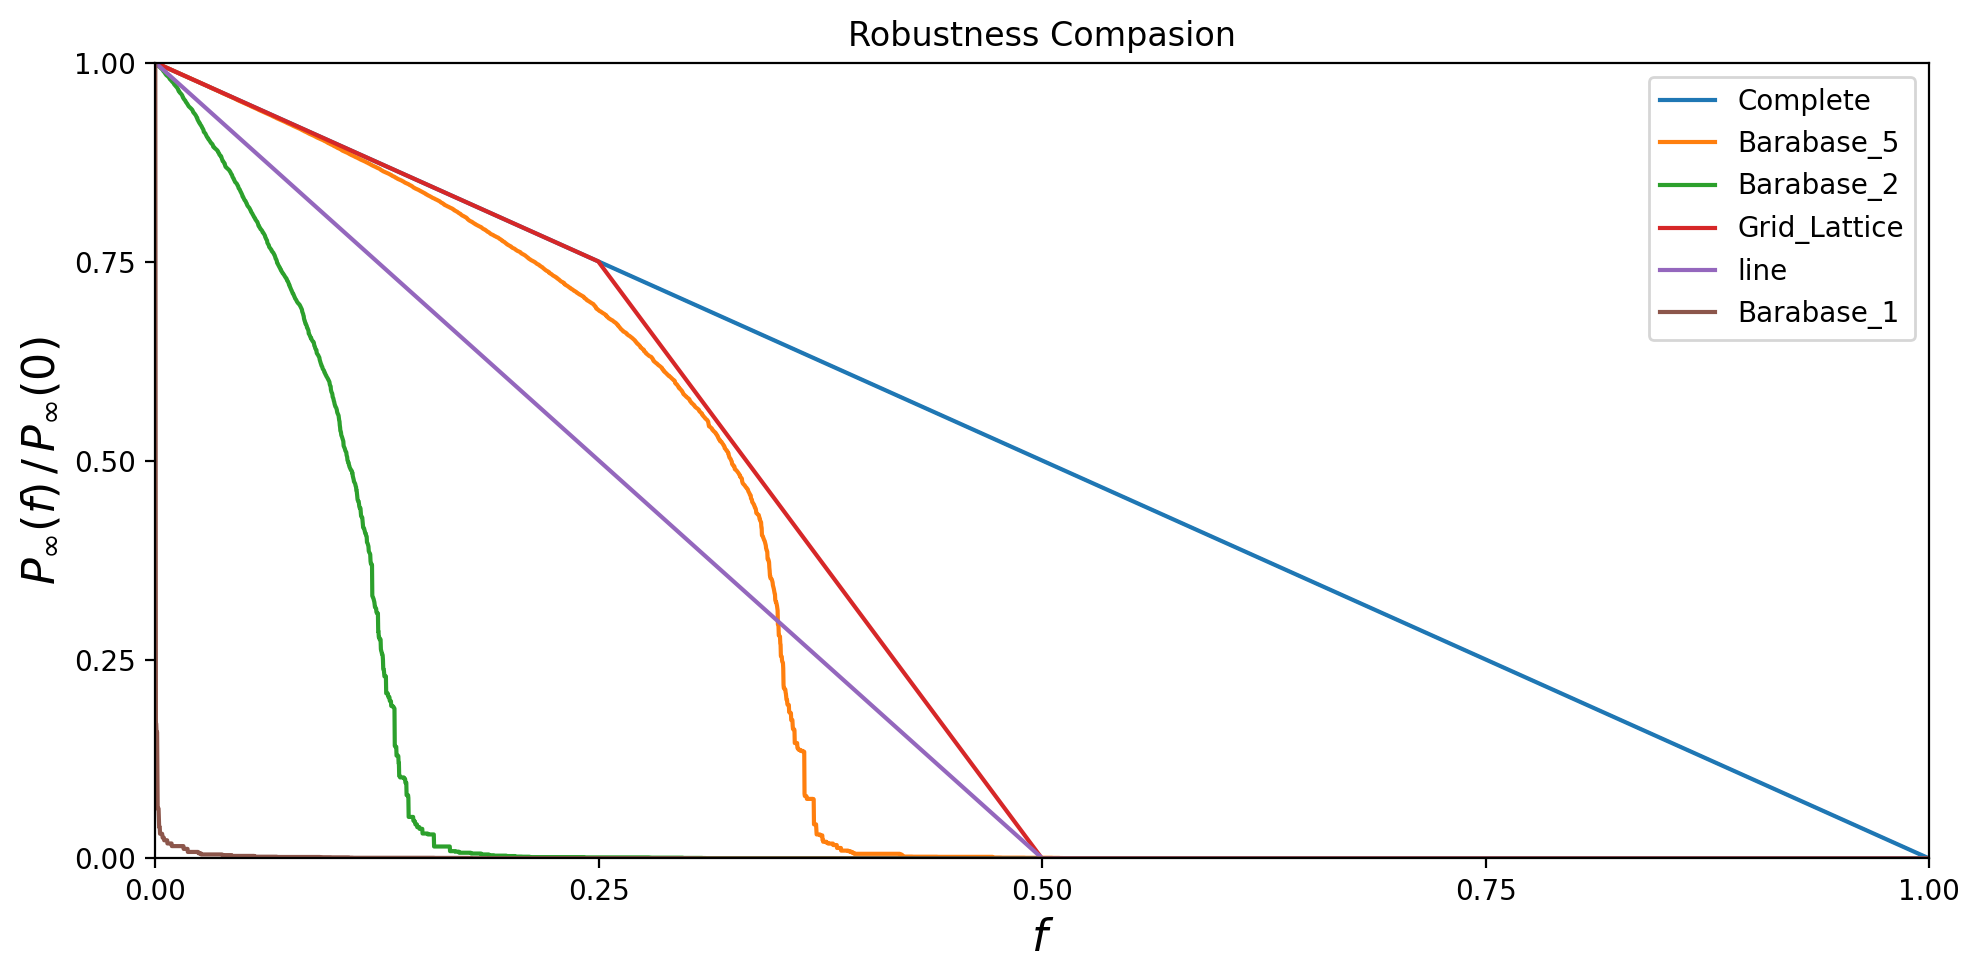

In [5]:
#Plotting    
plt.figure(figsize=(10,5),dpi=200)
plt.plot([0, 1], [1, 0], 'k--',linewidth=1)
for Gactual in listOfNetworks:
    G = Gactual.copy()
    Nstart = G.number_of_nodes()
    yAxis=[1]
    xAxis=[0]

    verticesOrdenados = list(dict(sorted(dict(G.degree).items(), key=lambda x:x[1],reverse=True)).keys())
    while len(verticesOrdenados)>0:
        G.remove_node(verticesOrdenados[0])
        Nactual = G.number_of_nodes()
        CCs = nx.connected_components(G)
        if Nactual != 0:
            LCC = max(CCs,key=len)
            #𝑃∞(𝑓)/𝑃∞(0)  = len(LCC)/Nstart # Because we start with a connect network, with only one connect component
            impact = len(LCC)/Nstart
        else:
            impact = 0 
        f = 1 - Nactual/Nstart
        yAxis.append(impact)
        xAxis.append(f)
        verticesOrdenados = list(dict(sorted(dict(G.degree).items(), key=lambda x:x[1],reverse=True)).keys())

    plt.plot(xAxis,yAxis,'-',label=G.name)
    
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks([0,0.25,0.5,0.75,1])
plt.ylabel(r'$P_{\infty}(f)\,/\, P_{\infty}(0)$',size=16)
plt.xlabel(r'$f$',size=16)
plt.margins(x=0.0)
plt.margins(y=0.0)
plt.title("Robustness Compasion")
plt.legend()
plt.tight_layout()
plt.show()  

### Clustering

In [17]:
for G in listOfNetworks:
    avgC=nx.average_clustering(G)
    print("Clustering",G.name+':',str(avgC),sep=' ')

Clustering Complete: 1.0
Clustering Barabase_5: 0.009838199847597632
Clustering Barabase_2: 0.009117369389797876
Clustering Grid_Lattice: 0.0
Clustering line: 0.0
Clustering Barabase_1: 0.0


### Personal explanation
<b>Complete:</b> Every node is connected with every other node, thus clustering 1. No matter how many nodes are removed, the network maintains a single connected component.</br>
<b>Barabase_5 and Barabase_2:</b> These are both scale-free networks, the difference is that the last add 2 edges for every node that are inserted in the graph, while the first add 5 edges. This increases the inter-connective, presence, and size of hubs (preferred attachment) and makes Barabase_5 more resilient to random attacks. </br>
<b>Barabase_1 and Line:</b> These networks share the same number of nodes, edges, and clustering. The difference is that Line does not have hubs, thus is less resilient to random attacks, but more resilient to hub attacks